#
📌 Extracão

In [1]:
import pandas as pd
import requests
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
# Testar conexão
response = requests.get(url)
print(f"Status Code: {response.status_code}")

# Ver estrutura do JSON
print(f"\nPrimeiros 1000 caracteres do JSON:")
print(response.text[:1000])

Status Code: 200

Primeiros 1000 caracteres do JSON:
[{"customerID":"0002-ORFBO","Churn":"No","customer":{"gender":"Female","SeniorCitizen":0,"Partner":"Yes","Dependents":"Yes","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"No"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"Yes","DeviceProtection":"No","TechSupport":"Yes","StreamingTV":"Yes","StreamingMovies":"No"},"account":{"Contract":"One year","PaperlessBilling":"Yes","PaymentMethod":"Mailed check","Charges":{"Monthly":65.6,"Total":"593.3"}}},{"customerID":"0003-MKNFE","Churn":"No","customer":{"gender":"Male","SeniorCitizen":0,"Partner":"No","Dependents":"No","tenure":9},"phone":{"PhoneService":"Yes","MultipleLines":"Yes"},"internet":{"InternetService":"DSL","OnlineSecurity":"No","OnlineBackup":"No","DeviceProtection":"No","TechSupport":"No","StreamingTV":"No","StreamingMovies":"Yes"},"account":{"Contract":"Month-to-month","PaperlessBilling":"No","PaymentMethod":"Mailed check","Charges":{"Mon

In [2]:
dados = response.json()
df = pd.DataFrame(dados)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


,customerID,Churn,customer,phone,internet,account
count,7267,7267,7267,7267,7267,7267
unique,7267,3,891,3,129,6931
top,9995-HOTOH,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'No', 'OnlineSecurity': 'N...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
freq,1,5174,223,3495,1581,6


In [4]:
df_customer = pd.json_normalize(dados, sep='_')
df_customer.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df_customer.shape
df_customer.columns.tolist()[:8]
df_customer.dtypes.value_counts()

,count
object,18
int64,2
float64,1


In [6]:
map_yesno = {'Yes': 1, 'No': 0}

for col in df_customer.columns:
    if df_customer[col].dtype == 'object':
        valores = set(df_customer[col].dropna().unique())
        if valores.issubset({'Yes', 'No'}):
            df_customer[col] = df_customer[col].map(map_yesno)

In [7]:
df_customer['Churn'] = df_customer['Churn'].map({'Yes': 1, 'No': 0})


In [8]:
df_customer['account_Charges_Total'] = pd.to_numeric(
    df_customer['account_Charges_Total'],
    errors='coerce'
)

In [9]:
df_customer['account_Charges_Total'] = df_customer['account_Charges_Total'].fillna(0)

#
📊 Carga e análise

In [10]:
df_customer['Churn'] = pd.json_normalize(dados)['Churn']

In [11]:
df_customer['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [12]:
import numpy as np

df_customer['Churn'] = df_customer['Churn'].replace('', np.nan)   # vazio -> NaN
df_customer['Churn'] = df_customer['Churn'].map({'Yes': 1, 'No': 0})

In [22]:
df_customer['Churn'].value_counts(dropna=False)

,count
Churn,
0.0,5174
1.0,1869
NaN,224


**Taxa geral de churn**

In [20]:
f"{round(df_customer['Churn'].mean() * 100, 2)}%"

'26.54%'

**Churn por tipo de contrato**

In [18]:
round(df_customer.groupby('account_Contract')['Churn'].mean() * 100, 2)

,Churn
account_Contract,
Month-to-month,42.71
One year,11.27
Two year,2.83


**Churn por tipo de internet**

In [19]:
round(df_customer.groupby('internet_InternetService')['Churn'].mean() * 100, 2)

,Churn
internet_InternetService,
DSL,18.96
Fiber optic,41.89
No,7.40


**churn por método de pagamento.**

In [23]:
round(df_customer.groupby('account_PaymentMethod')['Churn'].mean() * 100, 2)

,Churn
account_PaymentMethod,
Bank transfer (automatic),16.71
Credit card (automatic),15.24
Electronic check,45.29
Mailed check,19.11


**Churn por Tenure (tempo)**

In [24]:
df_customer['tenure_group'] = pd.cut(
    df_customer['customer_tenure'],
    bins=[0, 12, 24, 48, 60, 72],
    labels=['0-12m', '12-24m', '24-48m', '48-60m', '60-72m']
)

In [25]:
round(df_customer.groupby('tenure_group')['Churn'].mean() * 100, 2)

/tmp/ipython-input-479213078.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  round(df_customer.groupby('tenure_group')['Churn'].mean() * 100, 2)


,Churn
tenure_group,
0-12m,47.68
12-24m,28.71
24-48m,20.39
48-60m,14.42
60-72m,6.61


**Análise Descritiva**

In [26]:
df_customer[['customer_tenure', 'account_Charges_Total']].describe()

,customer_tenure,account_Charges_Total
count,7267.000000,7267.000000
mean,32.346498,2277.182035
std,24.571773,2268.648587
min,0.000000,0.000000
25%,9.000000,396.200000
50%,29.000000,1389.200000
75%,55.000000,3778.525000
max,72.000000,8684.800000


**Análise de Correlação com Churn**

In [27]:
df_num = df_customer.select_dtypes(include=['int64', 'float64'])

In [28]:
df_num.corr()['Churn'].sort_values(ascending=False)

,Churn
Churn,1.000000
account_Charges_Monthly,0.193356
account_PaperlessBilling,0.191825
customer_SeniorCitizen,0.150889
phone_PhoneService,0.011942
customer_Partner,-0.150448
customer_Dependents,-0.164221
account_Charges_Total,-0.198324
customer_tenure,-0.352229


# 📄Relatorio Final

# 📊 Análise de Evasão de Clientes (Churn)

## 🎯 Objetivo

O objetivo desta análise é investigar os fatores que influenciam a evasão de clientes (Churn) em uma empresa de telecomunicações. A evasão de clientes representa a perda de consumidores ao longo do tempo e pode impactar diretamente a receita e a sustentabilidade do negócio.

A partir da coleta, tratamento e análise dos dados, busca-se identificar padrões de comportamento associados ao cancelamento do serviço. Esses insights poderão auxiliar a equipe de Data Science no desenvolvimento de modelos preditivos e na elaboração de estratégias para reduzir a taxa de churn.

## 🧹 Limpeza e Tratamento de Dados

Os dados foram inicialmente coletados a partir de uma API no formato JSON aninhado. Para possibilitar a análise, foi necessário realizar a normalização desses dados utilizando a função `json_normalize()` da biblioteca Pandas.

Após a extração, foram realizados os seguintes tratamentos:

- Conversão de dados categóricos binários ("Yes"/"No") para valores numéricos (1/0);
- Tratamento de valores vazios na variável Churn, convertendo-os para valores nulos (NaN);
- Conversão de variáveis numéricas armazenadas como texto para o formato adequado (float);
- Criação de grupos de tempo de permanência dos clientes (tenure) para análise por faixas.

Essas etapas foram fundamentais para garantir a consistência dos dados e permitir a realização de análises estatísticas e cálculos posteriores.

## 📊 Análise Exploratória de Dados (EDA)

A análise exploratória foi conduzida com o objetivo de identificar padrões e fatores associados à evasão de clientes.

Inicialmente, foi calculada a taxa geral de churn da base de dados, revelando que aproximadamente 26,5% dos clientes cancelaram seus serviços.

Em seguida, foram realizadas análises segmentadas considerando diferentes variáveis:

- Tipo de contrato
- Tipo de serviço de internet
- Método de pagamento
- Tempo de permanência do cliente (tenure)

Os resultados indicaram que clientes com contratos mensais apresentam taxas de evasão significativamente maiores quando comparados a contratos de longo prazo. Além disso, clientes com serviço de fibra óptica e aqueles que utilizam o método de pagamento "Electronic Check" também apresentaram maior probabilidade de churn.

A análise por tempo de permanência revelou que a evasão é mais elevada entre clientes com até 12 meses de contrato, indicando um período crítico de cancelamento no primeiro ano de serviço.

<Axes: title={'center': 'Churn por Tipo de Contrato'}, xlabel='account_Contract'>

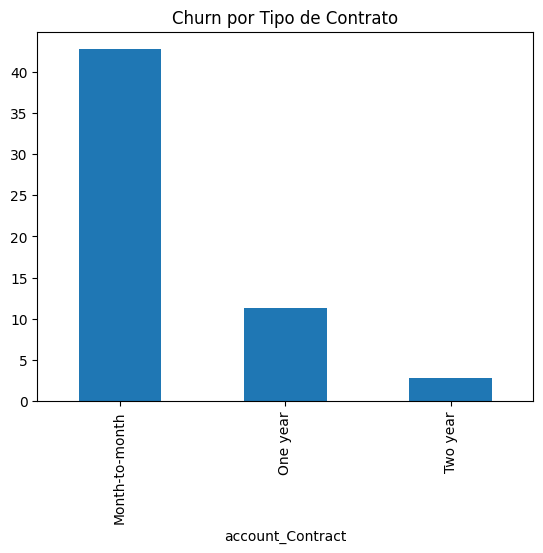

In [29]:
df_customer.groupby('account_Contract')['Churn'].mean().mul(100).plot(kind='bar', title='Churn por Tipo de Contrato')

<Axes: title={'center': 'Churn por Tipo de Internet'}, xlabel='internet_InternetService'>

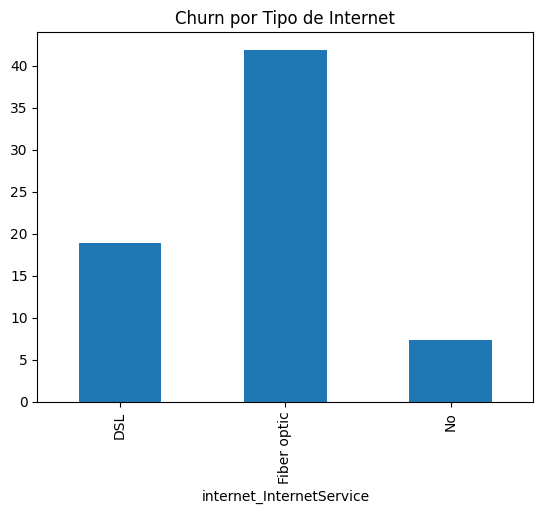

In [30]:
df_customer.groupby('internet_InternetService')['Churn'].mean().mul(100).plot(kind='bar', title='Churn por Tipo de Internet')

<Axes: title={'center': 'Churn por Método de Pagamento'}, xlabel='account_PaymentMethod'>

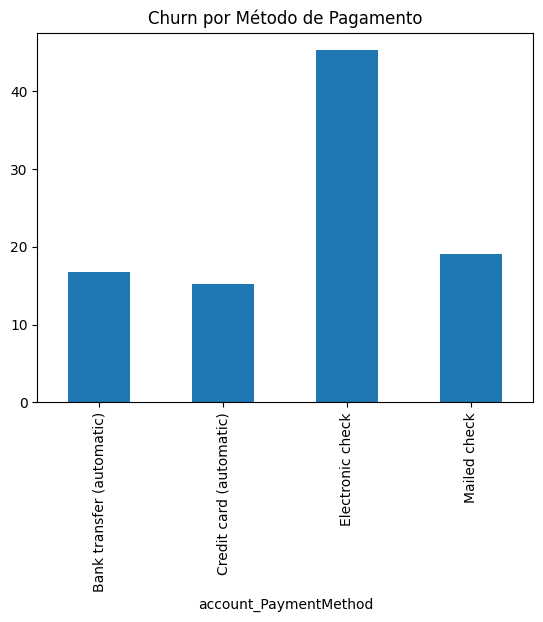

In [31]:
df_customer.groupby('account_PaymentMethod')['Churn'].mean().mul(100).plot(kind='bar', title='Churn por Método de Pagamento')

/tmp/ipython-input-1485445046.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_customer.groupby('tenure_group')['Churn'].mean().mul(100).plot(kind='bar', title='Churn por Tempo de Cliente')


<Axes: title={'center': 'Churn por Tempo de Cliente'}, xlabel='tenure_group'>

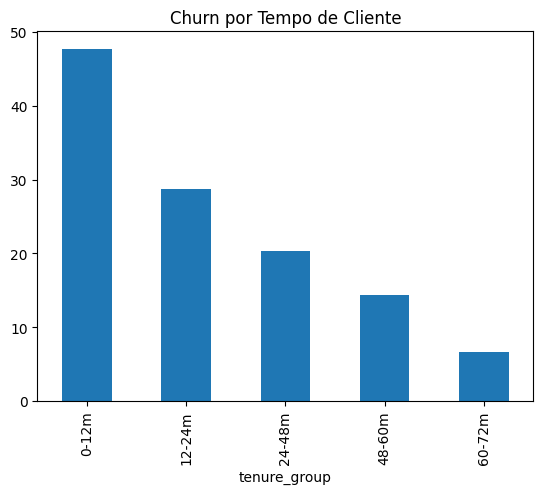

In [32]:
df_customer.groupby('tenure_group')['Churn'].mean().mul(100).plot(kind='bar', title='Churn por Tempo de Cliente')

## 🧠 Conclusões e Insights

A análise dos dados permitiu identificar alguns fatores relevantes associados à evasão de clientes:

- Clientes com contratos mensais apresentam maior probabilidade de cancelamento;
- O serviço de fibra óptica está associado a taxas mais elevadas de churn;
- O método de pagamento "Electronic Check" apresentou a maior taxa de evasão entre os métodos analisados;
- Clientes com menor tempo de permanência possuem maior probabilidade de cancelar o serviço;
- Existe uma correlação negativa entre o tempo de permanência (tenure) e a evasão, indicando que clientes mais antigos tendem a permanecer na base.

Esses achados sugerem que fatores relacionados ao tempo de relacionamento e ao tipo de contrato desempenham papel importante na retenção de clientes.

## 💡 Recomendações

Com base nos resultados obtidos, recomenda-se:

- Incentivar a migração de clientes com contratos mensais para planos de maior duração;
- Desenvolver estratégias de retenção voltadas para clientes com até 12 meses de contrato;
- Avaliar a experiência dos clientes que utilizam serviço de fibra óptica;
- Promover métodos de pagamento automáticos, como cartão de crédito ou transferência bancária;
- Implementar campanhas de engajamento durante o primeiro ano de serviço.

A adoção dessas medidas pode contribuir para a redução da taxa de churn e aumento da fidelização dos clientes.